<a href="https://colab.research.google.com/github/Raghav-Sahni/Hope_speech/blob/main/Exploratory%20Data%20Analysis/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!git clone https://{token}@github.com/Raghav-Sahni/Hope_speech.git

Cloning into 'Hope_speech'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 87 (delta 16), reused 43 (delta 10), pack-reused 33
Unpacking objects: 100% (87/87), done.


In [25]:
import nltk
from spacy import displacy
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import textstat
import os
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import spacy
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from spacytextblob.spacytextblob import SpacyTextBlob
#nltk.download('stopwords')
#nltk.download('vader_lexicon')

In [12]:
#os.chdir("Hope_speech")

In [16]:
!ls

 Data		       Explainability		    Models     README.md
'Data Preprocessing'  'Exploratory Data Analysis'   Proposal   Word_Embeddings


In [87]:
#english_train = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\english_train.csv'))
english_train = pd.read_csv("Data/english_train.csv")
#english_validation = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\english_validation.csv'))
english_validation = pd.read_csv("Data/english_validation.csv")

df_english = pd.concat([english_train, english_validation], ignore_index=True)

#malayalam_train = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\malayalam_train.csv'))
malayalam_train = pd.read_csv("Data/malayalam_train.csv")
#malayalam_validation = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\malayalam_validation.csv'))
malayalam_validation = pd.read_csv("Data/malayalam_validation.csv")
df_malayalam = pd.concat([malayalam_train, malayalam_validation], ignore_index=True)

#tamil_train = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), r'Data\tamil_train.csv'))
tamil_train = pd.read_csv("Data/tamil_train.csv")
#tamil_validation = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), r'Data\tamil_validation.csv'))
tamil_validation = pd.read_csv("Data/tamil_validation.csv")
df_tamil = pd.concat([tamil_train, tamil_validation], ignore_index=True)

In [88]:
df_english.head()

,text,label
0,these tiktoks radiate gay chaotic energy and i...,1
1,@Champions Again He got killed for using false...,1
2,It's not that all lives don't matter,1
3,Is it really that difficult to understand? Bla...,1
4,Whenever we say black isn't that racists? Why...,1


In [92]:
textstat.set_lang("en")
df_english["readability"] = df_english["text"].apply(lambda x: textstat.flesch_reading_ease(x))
df_english["ARI"] = df_english["text"].apply(lambda x: textstat.automated_readability_index(x)) #tells what grade is needed to read the text

In [96]:
doc = nlp(df_english["text"].values[0])
sent = list(doc.sents)[0]

In [97]:
HTML(displacy.render(sent, style = "dep"))

In [93]:
df_english.head()

,text,label,readability,ARI
0,these tiktoks radiate gay chaotic energy and i...,1,69.79,4.8
1,@Champions Again He got killed for using false...,1,87.72,6.1
2,It's not that all lives don't matter,1,106.67,2.3
3,Is it really that difficult to understand? Bla...,1,72.36,8.7
4,Whenever we say black isn't that racists? Why...,1,82.31,5.1


In [99]:
df_english.to_csv("post_process_eng.csv")

In [23]:
## Remove Punctuation
def remove_punctuation(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation and char not in '.’'])
    return text_nopunct

df_english['text'] = df_english['text'].apply(lambda x: remove_punctuation(x))

In [24]:
df_english.head()

,text,label
0,these tiktoks radiate gay chaotic energy and i...,1
1,Champions Again He got killed for using false ...,1
2,Its not that all lives dont matter,1
3,Is it really that difficult to understand Blac...,1
4,Whenever we say black isnt that racists Why d...,1


## Tokenize

In [28]:
english_stop_words = list(set(stopwords.words('english')))
english_stop_words.append('I')
english_stop_words.append('i')
def tokenize(tweet, remove_stopwords=False):
    tknzr = TweetTokenizer()
    tokens = tknzr.tokenize(tweet)
    if remove_stopwords:
        tokens = [w for w in tokens if not w in english_stop_words]
    return tokens

In [29]:
df_english['tokens_without_stopwords'] = df_english['text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_english['tokens_with_stopwords'] = df_english['text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [31]:
df_english.head()

,text,label,tokens_without_stopwords,tokens_with_stopwords
0,these tiktoks radiate gay chaotic energy and i...,1,"[tiktoks, radiate, gay, chaotic, energy, love]","[these, tiktoks, radiate, gay, chaotic, energy..."
1,Champions Again He got killed for using false ...,1,"[Champions, Again, He, got, killed, using, fal...","[Champions, Again, He, got, killed, for, using..."
2,Its not that all lives dont matter,1,"[Its, lives, dont, matter]","[Its, not, that, all, lives, dont, matter]"
3,Is it really that difficult to understand Blac...,1,"[Is, really, difficult, understand, Black, liv...","[Is, it, really, that, difficult, to, understa..."
4,Whenever we say black isnt that racists Why d...,1,"[Whenever, say, black, isnt, racists, Why, don...","[Whenever, we, say, black, isnt, that, racists..."


In [ ]:
# from indicnlp import common
# from indicnlp import loader
# from indicnlp.tokenize import indic_tokenize

# # git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

# # The path to the local git repo for Indic NLP Resources
# INDIC_NLP_RESOURCES = r"D:\Desktop\ML Group Project\indic_nlp_resources"

# # Export the path to the Indic NLP Resources directory programmatically
# common.set_resources_path(INDIC_NLP_RESOURCES)

# # Initialize the Indic NLP library
# loader.load()

In [ ]:
# tamil_stop_words = []
# with open('TamilStopWords.txt', encoding="utf8") as f:
#     for line in f:
#         tamil_stop_words.append(line.strip())

# def tokenize_tamil(tweet, remove_stopwords=False):
#     tokens = indic_tokenize.trivial_tokenize(tweet)
#     if remove_stopwords:
#         tokens = [w for w in tokens if not w in tamil_stop_words]
#     return tokens

# df_tamil['tokens_without_stopwords'] = df_tamil['text'].apply(lambda x: tokenize_tamil(x, remove_stopwords=True))
# df_tamil['tokens_with_stopwords'] = df_tamil['text'].apply(lambda x: tokenize_tamil(x, remove_stopwords=False))

In [32]:
df_tamil['tokens_without_stopwords'] = df_tamil['text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_tamil['tokens_with_stopwords'] = df_tamil['text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [33]:
df_tamil.head()

,text,label,tokens_without_stopwords,tokens_with_stopwords
0,Realme india product,2,"[Realme, india, product]","[Realme, india, product]"
1,I also don't have tiktok hello and allnBut I'm...,0,"[also, tiktok, hello, allnBut, I'm, using, xia...","[I, also, don't, have, tiktok, hello, and, all..."
2,Thalaivare..neengale inum one plus mobile vach...,1,"[Thalaivare, .., neengale, inum, one, plus, mo...","[Thalaivare, .., neengale, inum, one, plus, mo..."
3,Annee varanda thondai.. corona virus affect pa...,0,"[Annee, varanda, thondai, .., corona, virus, a...","[Annee, varanda, thondai, .., corona, virus, a..."
4,5views but 18likes,1,"[5views, 18likes]","[5views, but, 18likes]"


In [34]:
df_malayalam['tokens_without_stopwords'] = df_malayalam['text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_malayalam['tokens_with_stopwords'] = df_malayalam['text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [36]:
df_malayalam.head()

,text,label,tokens_without_stopwords,tokens_with_stopwords
0,@arya s nair may be athile karthikayude charct...,1,"[@arya, nair, may, athile, karthikayude, charc...","[@arya, s, nair, may, be, athile, karthikayude..."
1,വാങ്ങിയത് എന്ത് കുന്തം ആയാലും കളയാൻ പറ്റില്ലല്...,1,"[വാങ്ങിയത്, എന്ത്, കുന്തം, ആയാലും, കളയാൻ, പറ്റ...","[വാങ്ങിയത്, എന്ത്, കുന്തം, ആയാലും, കളയാൻ, പറ്റ..."
2,മാറുമറയ്ക്കാൻ നടത്തിയ സമരം ഒരു previlege issue...,0,"[മാറുമറയ്ക്കാൻ, നടത്തിയ, സമരം, ഒരു, previlege,...","[മാറുമറയ്ക്കാൻ, നടത്തിയ, സമരം, ഒരു, previlege,..."
3,ഇഷാനെ കൂടുതല് കെട്ടിപിടിക്കേണ്ട ഞങ്ങൾക്കറിയാം ...,1,"[ഇഷാനെ, കൂടുതല്, കെട്ടിപിടിക്കേണ്ട, ഞങ്ങൾക്കറി...","[ഇഷാനെ, കൂടുതല്, കെട്ടിപിടിക്കേണ്ട, ഞങ്ങൾക്കറി..."
4,ഇന്ത്യ ഇസ്‌ലാമിക രാജ്യമല്ല.. ഇന്ത്യൻ ഭരണഘടന മാ...,0,"[ഇന്ത്യ, ഇസ്‌ലാമിക, രാജ്യമല്ല, .., ഇന്ത്യൻ, ഭര...","[ഇന്ത്യ, ഇസ്‌ലാമിക, രാജ്യമല്ല, .., ഇന്ത്യൻ, ഭര..."


In [37]:
df_english['Word Count without Stopwords'] = df_english['tokens_without_stopwords'].apply(lambda x: len(x))
df_english['Character Count'] = df_english['text'].apply(lambda x: len(x))
df_english['Average Word Length without Stopwords'] = df_english['Character Count'] / df_english['Word Count without Stopwords']
df_english['Word Count with Stopwords'] = df_english['tokens_with_stopwords'].apply(lambda x: len(x))
df_english['Average Word Length with Stopwords'] = df_english['Character Count'] / df_english['Word Count with Stopwords']
df_english['Text without Stopwords'] = df_english['tokens_without_stopwords'].apply(lambda x: ' '.join(x))

In [38]:
df_english.head()

,text,label,tokens_without_stopwords,tokens_with_stopwords,Word Count without Stopwords,Character Count,Average Word Length without Stopwords,Word Count with Stopwords,Average Word Length with Stopwords,Text without Stopwords
0,these tiktoks radiate gay chaotic energy and i...,1,"[tiktoks, radiate, gay, chaotic, energy, love]","[these, tiktoks, radiate, gay, chaotic, energy...",6,54,9.000000,10,5.400000,tiktoks radiate gay chaotic energy love
1,Champions Again He got killed for using false ...,1,"[Champions, Again, He, got, killed, using, fal...","[Champions, Again, He, got, killed, for, using...",8,51,6.375000,9,5.666667,Champions Again He got killed using false money
2,Its not that all lives dont matter,1,"[Its, lives, dont, matter]","[Its, not, that, all, lives, dont, matter]",4,34,8.500000,7,4.857143,Its lives dont matter
3,Is it really that difficult to understand Blac...,1,"[Is, really, difficult, understand, Black, liv...","[Is, it, really, that, difficult, to, understa...",47,447,9.510638,79,5.658228,Is really difficult understand Black lives mat...
4,Whenever we say black isnt that racists Why d...,1,"[Whenever, say, black, isnt, racists, Why, don...","[Whenever, we, say, black, isnt, that, racists...",9,68,7.555556,12,5.666667,Whenever say black isnt racists Why dont say A...


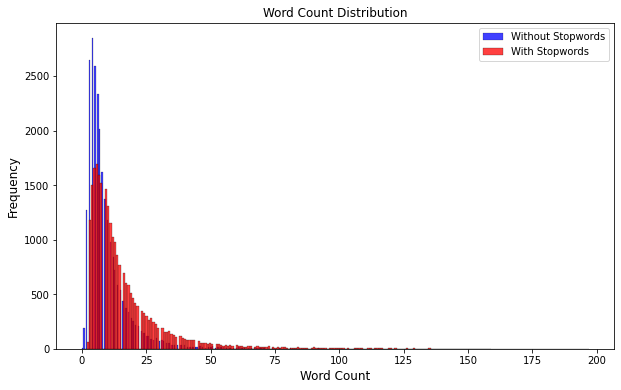

In [39]:
# Histogram of Word Count without Stopwords and with Stopwords on same plot
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Word Count without Stopwords'], color='blue', label='Without Stopwords', ax=ax)
sns.histplot(df_english['Word Count with Stopwords'], color='red', label='With Stopwords', ax=ax)
# set title and labels
ax.set_title('Word Count Distribution', fontsize=12)
ax.set_xlabel('Word Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

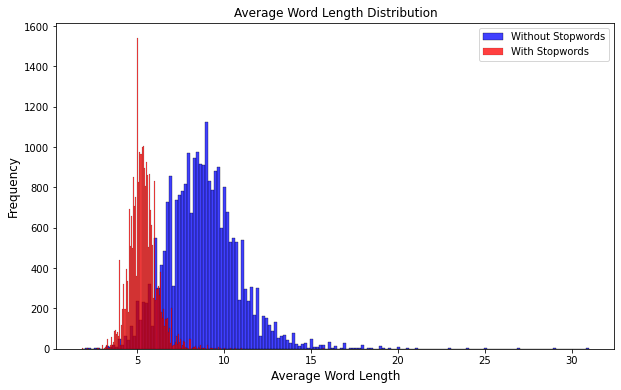

In [40]:
# Histogram of Average Word Length without Stopwords and with Stopwords on same plot
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Average Word Length without Stopwords'], color='blue', label='Without Stopwords', ax=ax)
sns.histplot(df_english['Average Word Length with Stopwords'], color='red', label='With Stopwords', ax=ax)
# set title and labels
ax.set_title('Average Word Length Distribution', fontsize=12)
ax.set_xlabel('Average Word Length', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

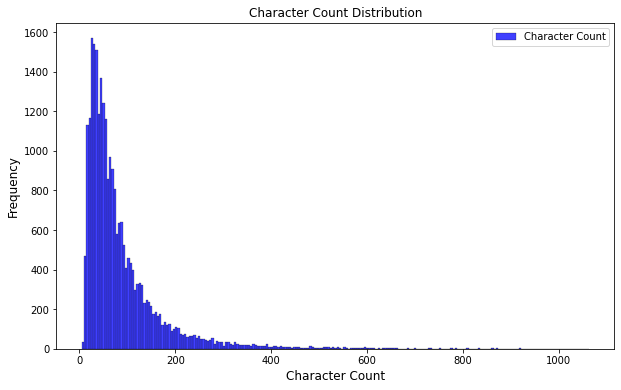

In [41]:
# Histogram of character count
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Character Count'], color='blue', label='Character Count', ax=ax)
# set title and labels
ax.set_title('Character Count Distribution', fontsize=12)
ax.set_xlabel('Character Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

In [42]:
corpus_without_stopwords = ' '.join(df_english['Text without Stopwords'])
corpus_without_stopwords = corpus_without_stopwords.split()

corpus_with_stopwords = ' '.join(df_english['text'])
corpus_with_stopwords = corpus_with_stopwords.split()

# create a dictionary of words and their frequency

def create_dictionary(corpus):
    word_freq = {}
    for word in corpus:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    return word_freq

word_freq_without_stopwords = create_dictionary(corpus_without_stopwords)
word_freq_with_stopwords = create_dictionary(corpus_with_stopwords)
# get stop word frequency
stop_word_freq = {}
for word in english_stop_words:
    if word in word_freq_with_stopwords.keys():
        stop_word_freq[word] = word_freq_with_stopwords[word]

In [43]:
# sort the dictionary by values
sorted_stop_word_freq = sorted(stop_word_freq.items(), key=lambda x: x[1], reverse=True)
word_freq_with_stopwords = sorted(word_freq_with_stopwords.items(), key=lambda x: x[1], reverse=True)
word_freq_without_stopwords = sorted(word_freq_without_stopwords.items(), key=lambda x: x[1], reverse=True)

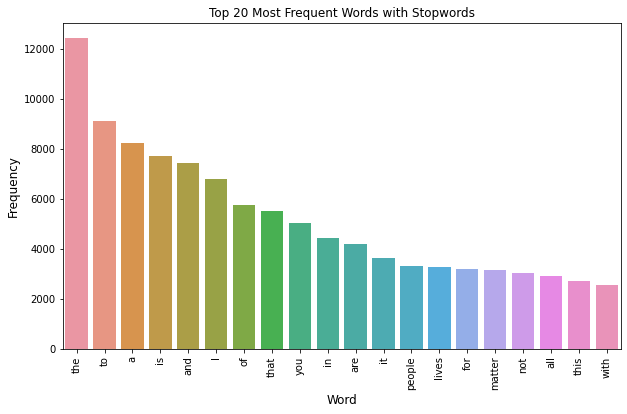

In [44]:
# plot the top 20 most frequent words
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot bar chart
sns.barplot(x=[x[0] for x in word_freq_with_stopwords[:20]], y=[x[1] for x in word_freq_with_stopwords[:20]], ax=ax)
# set title and labels
ax.set_title('Top 20 Most Frequent Words with Stopwords', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()

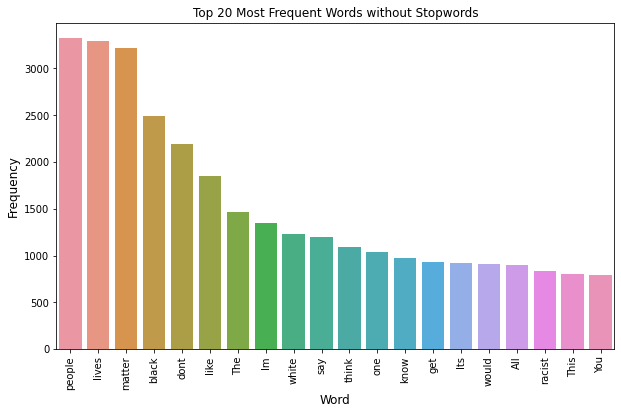

In [45]:
# plot the top 20 most frequent words without stopwords
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot bar chart
sns.barplot(x=[x[0] for x in word_freq_without_stopwords[:20]], y=[x[1] for x in word_freq_without_stopwords[:20]], ax=ax)
# set title and labels
ax.set_title('Top 20 Most Frequent Words without Stopwords', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()

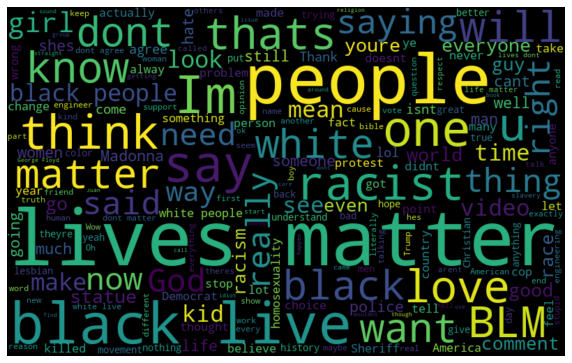

In [46]:
# word cloud
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(corpus_with_stopwords))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

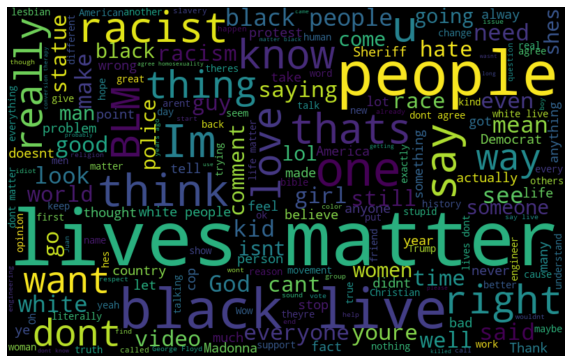

In [47]:
# word cloud
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(corpus_without_stopwords))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
df_english['label'].value_counts()

1    23347
0     2234
2       24
Name: label, dtype: int64

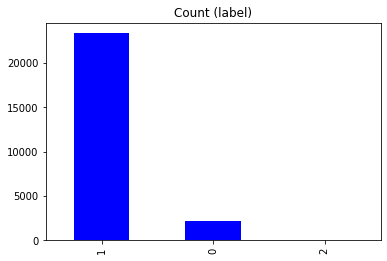

In [49]:
df_english['label'].value_counts().plot(kind='bar', title='Count (label)', color='blue')

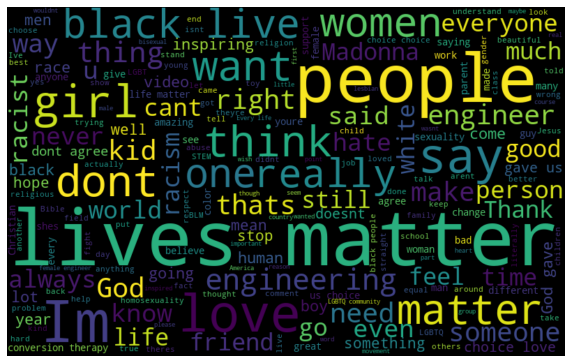

In [50]:
# Word Cloud for Class 0
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_english[df_english['label'] == 0]['Text without Stopwords']))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

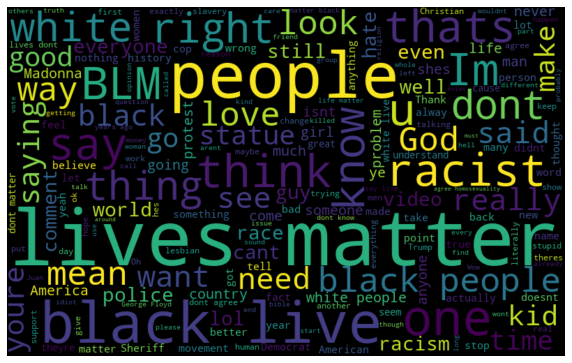

In [51]:
# Word Cloud for Class 1
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_english[df_english['label'] == 1]['Text without Stopwords']))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

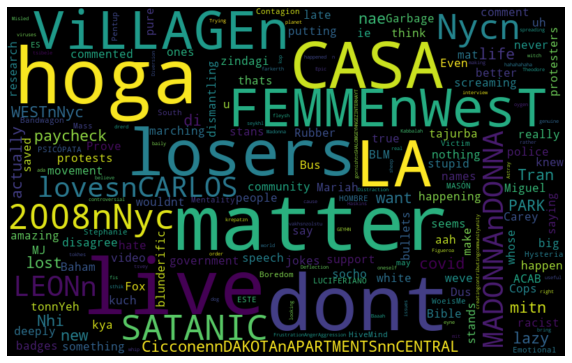

In [ ]:
# Word Cloud for Class 2
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_english[df_english['label'] == 2]['Text without Stopwords']))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [76]:
# Sentiment Analysis using TextBlob
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# create two new columns 'Subjectivity' & 'Polarity'
df_english['Subjectivity'] = df_english['text'].apply(getSubjectivity)
df_english['Polarity'] = df_english['text'].apply(getPolarity)

In [77]:
df_english.head()

,text,label,tokens_without_stopwords,tokens_with_stopwords,Word Count without Stopwords,Character Count,Average Word Length without Stopwords,Word Count with Stopwords,Average Word Length with Stopwords,Text without Stopwords,Subjectivity,Polarity,Sentiment Scores
0,these tiktoks radiate gay chaotic energy and i...,1,"[tiktoks, radiate, gay, chaotic, energy, love]","[these, tiktoks, radiate, gay, chaotic, energy...",6,54,9.000000,10,5.400000,tiktoks radiate gay chaotic energy love,0.591667,0.458333,1
1,Champions Again He got killed for using false ...,1,"[Champions, Again, He, got, killed, using, fal...","[Champions, Again, He, got, killed, for, using...",8,51,6.375000,9,5.666667,Champions Again He got killed using false money,0.300000,-0.300000,-1
2,Its not that all lives dont matter,1,"[Its, lives, dont, matter]","[Its, not, that, all, lives, dont, matter]",4,34,8.500000,7,4.857143,Its lives dont matter,0.000000,0.000000,0
3,Is it really that difficult to understand Blac...,1,"[Is, really, difficult, understand, Black, liv...","[Is, it, really, that, difficult, to, understa...",47,447,9.510638,79,5.658228,Is really difficult understand Black lives mat...,0.415040,-0.033889,-1
4,Whenever we say black isnt that racists Why d...,1,"[Whenever, say, black, isnt, racists, Why, don...","[Whenever, we, say, black, isnt, that, racists...",9,68,7.555556,12,5.666667,Whenever say black isnt racists Why dont say A...,0.433333,-0.166667,1


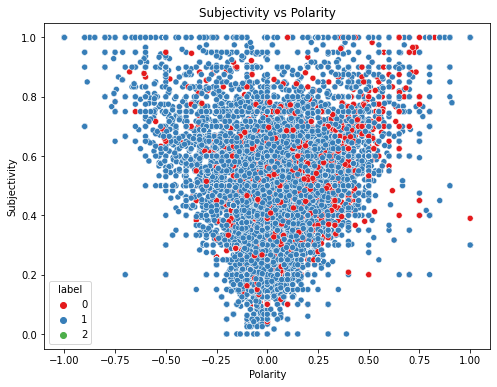

In [55]:
# plot subjectivity and polarity
from turtle import color
plt.figure(figsize=(8,6))
sns.scatterplot(x = df_english['Polarity'], y = df_english['Subjectivity'], hue=df_english['label'], palette='Set1')
plt.title('Subjectivity vs Polarity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [60]:
# Vader Sentiment Analysis
# create a function to get the sentiment scores (using compound score as a metric)
def getSentimentScores(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 1
    elif sentiment['compound'] <= -0.05:
        return -1
    else:
        return 0
# create a new column 'Sentiment Scores'

getSentimentScores = np.vectorize(getSentimentScores)

df_english['Sentiment Scores'] = getSentimentScores(df_english['text'].values)

In [80]:
df_english.head()

,text,label,tokens_without_stopwords,tokens_with_stopwords,Word Count without Stopwords,Character Count,Average Word Length without Stopwords,Word Count with Stopwords,Average Word Length with Stopwords,Text without Stopwords,Subjectivity,Polarity,Sentiment Scores
0,these tiktoks radiate gay chaotic energy and i...,1,"[tiktoks, radiate, gay, chaotic, energy, love]","[these, tiktoks, radiate, gay, chaotic, energy...",6,54,9.000000,10,5.400000,tiktoks radiate gay chaotic energy love,0.591667,0.458333,1
1,Champions Again He got killed for using false ...,1,"[Champions, Again, He, got, killed, using, fal...","[Champions, Again, He, got, killed, for, using...",8,51,6.375000,9,5.666667,Champions Again He got killed using false money,0.300000,-0.300000,-1
2,Its not that all lives dont matter,1,"[Its, lives, dont, matter]","[Its, not, that, all, lives, dont, matter]",4,34,8.500000,7,4.857143,Its lives dont matter,0.000000,0.000000,0
3,Is it really that difficult to understand Blac...,1,"[Is, really, difficult, understand, Black, liv...","[Is, it, really, that, difficult, to, understa...",47,447,9.510638,79,5.658228,Is really difficult understand Black lives mat...,0.415040,-0.033889,-1
4,Whenever we say black isnt that racists Why d...,1,"[Whenever, say, black, isnt, racists, Why, don...","[Whenever, we, say, black, isnt, that, racists...",9,68,7.555556,12,5.666667,Whenever say black isnt racists Why dont say A...,0.433333,-0.166667,1


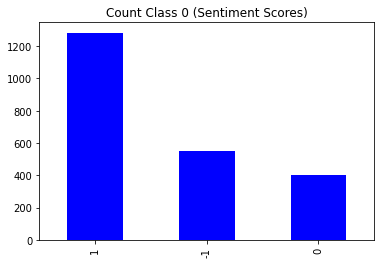

In [62]:
df_english[df_english['label']==0]['Sentiment Scores'].value_counts().plot(kind='bar', title='Count Class 0 (Sentiment Scores)', color='blue')

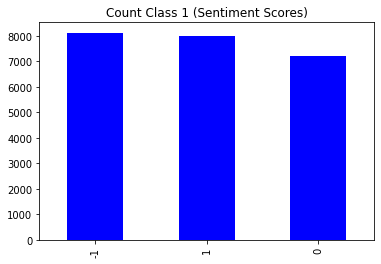

In [63]:
df_english[df_english['label']==1]['Sentiment Scores'].value_counts().plot(kind='bar', title='Count Class 1 (Sentiment Scores)', color='blue')

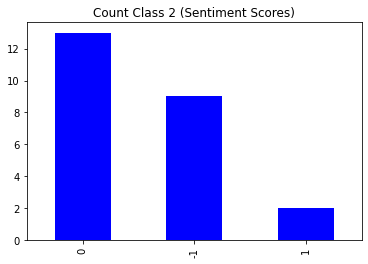

In [64]:
df_english[df_english['label']==2]['Sentiment Scores'].value_counts().plot(kind='bar', title='Count Class 2 (Sentiment Scores)', color='blue')

In [71]:
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
text = df_english.values[0][0]
doc = nlp(text)
print(f"Polarity: {doc._.blob.polarity}")
print(f"Subjectivity: {doc._.blob.subjectivity}")                       
print(f"Sentiment: {doc._.blob.sentiment_assessments.assessments}")
print(f"ngrams: {doc._.blob.ngrams()}") 

Polarity: 0.45833333333333337
Subjectivity: 0.5916666666666667
Sentiment: [(['gay'], 0.4166666666666667, 0.5833333333333334, None), (['love'], 0.5, 0.6, None)]
ngrams: [WordList(['these', 'tiktoks', 'radiate']), WordList(['tiktoks', 'radiate', 'gay']), WordList(['radiate', 'gay', 'chaotic']), WordList(['gay', 'chaotic', 'energy']), WordList(['chaotic', 'energy', 'and']), WordList(['energy', 'and', 'i']), WordList(['and', 'i', 'love']), WordList(['i', 'love', 'it'])]


In [79]:
df_english.to_csv("english_updated.csv")

In [100]:
!git add .

In [102]:
!git config --global user.email "sahniraghavdlf@gmail.com"
!git config --global user.name "Raghav-Sahni"

In [103]:
!git commit -m "added some spacy plots and some did some post pre processing work and saved updated dfs"

[main 511cf4c] added som spacy plots and some did some post pre processing work and saved updated dfs
 2 files changed, 51212 insertions(+)
 create mode 100644 english_updated.csv
 create mode 100644 post_process_eng.csv


In [104]:
!git push

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 4.28 MiB | 2.60 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/Raghav-Sahni/Hope_speech.git
   b9b3c2a..511cf4c  main -> main


In [ ]:
!git add 